In [2]:
import json
import pennylane as qml
import pennylane.numpy as np

In [76]:
def create_Hamiltonian(h):
    """
    Function in charge of generating the Hamiltonian of the statement.

    Args:
        h (float): magnetic field strength

    Returns:
        (qml.Hamiltonian): Hamiltonian of the statement associated to h
    """


    # Put your code here #
    couplings = []
    ops = []
    
    for i in range(4):
        ops += [qml.PauliZ(i)@qml.PauliZ((i+1)%4)]
        couplings += [-1]
    for i in range(4):
        ops += [qml.PauliX(i)]
        couplings += [-h]
        
    return qml.Hamiltonian(couplings, ops)
        
dev = qml.device("default.qubit", wires=4)

@qml.qnode(dev)
def model(params, H):
    """
    To implement VQE you need an ansatz for the candidate ground state!
    Define here the VQE ansatz in terms of some parameters (params) that
    create the candidate ground state. These parameters will
    be optimized later.

    Args:
        params (numpy.array): parameters to be used in the variational circuit
        H (qml.Hamiltonian): Hamiltonian used to calculate the expected value

    Returns:
        (float): Expected value with respect to the Hamiltonian H
    """


    # Put your code here #
    for i in range(4):
        qml.RX(params[i],i)
        qml.RY(params[i+4],i)
    
    return qml.expval(H)

def train(h):
    """
    In this function you must design a subroutine that returns the
    parameters that best approximate the ground state.

    Args:
        h (float): magnetic field strength

    Returns:
        (numpy.array): parameters that best approximate the ground state.
    """


    # Put your code here #
    max_it = 100
    
    ham = create_Hamiltonian(h)
    
    opt = qml.GradientDescentOptimizer(stepsize=0.4)
    theta = np.random.uniform(low=0.,high=2.*np.pi,size=(8,), requires_grad=True)
    
    params = [theta]
    energies = [model(theta,ham)]
    tol = 1.e-3
    
    for n in range(max_it):
        (theta, hnew), prev_energy = opt.step_and_cost(model, theta, ham)
        
        energies.append(model(theta,ham))
        params.append(theta)
        
        if np.abs(prev_energy-energies[-1])<tol:
            break

    return theta

In [51]:
ham = create_Hamiltonian(0.3)
theta=np.random.uniform(low=0.,high=2.*np.pi,size=(8,), requires_grad=True)
model(theta,ham)

tensor(-0.13465367, requires_grad=True)

In [68]:
hist = train(2.5)


step  0
step  10
step  20
step  30
step  40
step  50
step  60
step  70
step  80
step  90


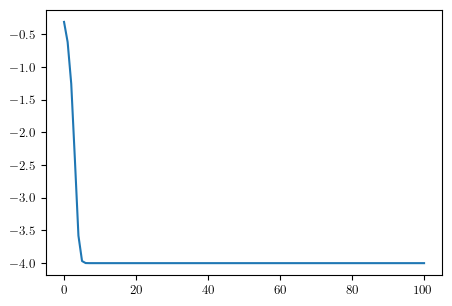

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist[0])

In [77]:
# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    ins = json.loads(test_case_input)
    params = train(ins)
    return str(model(params, create_Hamiltonian(ins)))


def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, rtol=1e-1
    ), "The expected value is not correct."

In [78]:
test_cases = [['1.0', '-5.226251859505506'], ['2.3', '-9.66382463698038']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '1.0'...
step  0
step  10
Correct!
Running test case 1 with input '2.3'...
step  0
Correct!
